# **PREDICTION DU NIVEAU D'ENGAGEMENT DES JOUEURS EN LIGNE**

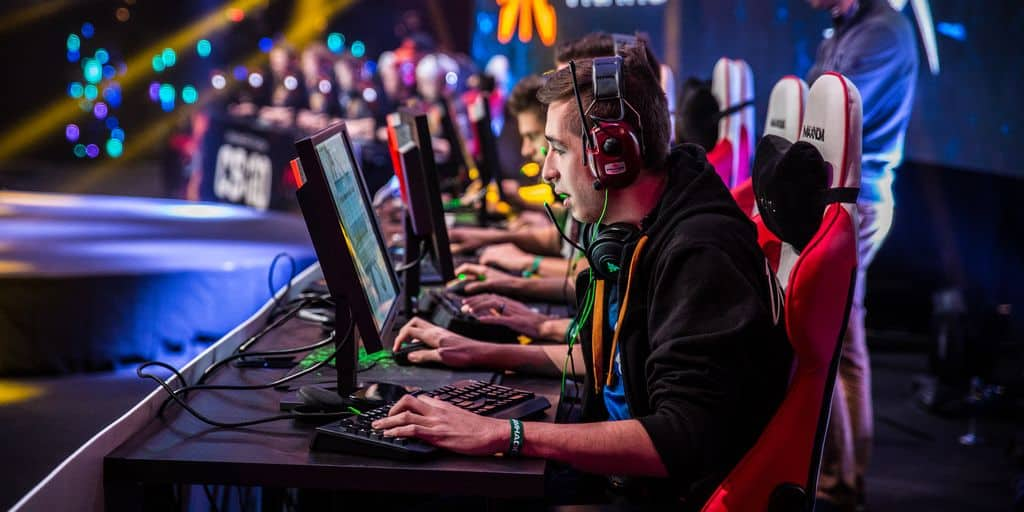

## **Contexte du Projet**
Avec la croissance exponentielle de l'industrie des jeux en ligne, comprendre et prédire le niveau d'engagement des joueurs est devenu crucial pour les développeurs de **jeux** et **les entreprises de jeux** . La capacité à **anticiper les comportements des joueurs** aidera à améliorer l'expérience utilisateur, à **accroître l'engagement des joueur** et **optimiser les stratégies de monétisation**.

## **Objectifs du Projet**
**Construire un modèle ML capable de prédir le niveau d'engagement des joueurs en ligne en fonction de leurs caractéristiques démographiques et comportementales.**

*En résumé, il vise à exploiter les données disponibles pour comprendre et prédire les performances des joueurs en ligne, avec un focus particulier sur le niveau d'engagement, en utilisant des techniques avancées d'analyse de données et de modélisation prédictive.*

## import package

In [152]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


# data manipulation
import pandas as pd
import numpy as np

# data visualization
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from IPython.display import display
import os
sns.set()

# filter warnings
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Chargement des données

In [153]:
path = "donnees soring de la performance joueur en ligne.txt"
df= pd.read_csv(path,sep='\t')

In [154]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43.0,Male,Other,Strategy,16.271119,0,Medium,6.0,108.0,79.0,25.0,Medium
1,9001,29.0,Female,USA,Strategy,5.525961,0,Medium,5.0,144.0,11.0,10.0,Medium
2,9002,22.0,Female,USA,Sports,8.223755,0,Easy,NaN,142.0,35.0,41.0,High
3,9003,35.0,Male,USA,Action,5.265351,1,Easy,9.0,85.0,57.0,47.0,Medium
4,9004,33.0,Male,Europe,Action,15.531945,0,Medium,2.0,131.0,95.0,37.0,Medium


#### Description des Données

In [155]:
print("Nombre de ligne de la base : ", df.shape[0])
print("Nombre de colonne de la base : " ,df.shape[1])

Nombre de ligne de la base :  29710
Nombre de colonne de la base :  13


In [156]:
df.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

In [157]:
df.dtypes , df.count()

(PlayerID                       int64
 Age                          float64
 Gender                        object
 Location                      object
 GameGenre                     object
 PlayTimeHours                float64
 InGamePurchases                int64
 GameDifficulty                object
 SessionsPerWeek              float64
 AvgSessionDurationMinutes    float64
 PlayerLevel                  float64
 AchievementsUnlocked         float64
 EngagementLevel               object
 dtype: object,
 PlayerID                     29710
 Age                          29696
 Gender                       29710
 Location                     29710
 GameGenre                    29710
 PlayTimeHours                29710
 InGamePurchases              29710
 GameDifficulty               29710
 SessionsPerWeek              29704
 AvgSessionDurationMinutes    29707
 PlayerLevel                  29706
 AchievementsUnlocked         29705
 EngagementLevel              29710
 dtype: int64)

In [158]:
# Niveau d'engagement
print("les proportions d'engagement :")
df["EngagementLevel"].value_counts(normalize=True)

les proportions d'engagement :


EngagementLevel
Medium    0.652104
High      0.347896
Name: proportion, dtype: float64

### Data Processing

Deux datasets format de dataset seront proposés afin de voir lequel permet de discriminer au mieux la variable cible. <br>
Il s'agit : <br>
- le dataset éclaté par le processus *dummies* (dataset : `data_complet`) ; <br>
- le dataset dont les modalités des variables catégorielles sont remplacés par leur proportion respective (dataset : `data_modFreq`). <br>

#### Traitement des valeurs manquantes

In [159]:
#Donnée Manquantes
df.isnull().sum()

PlayerID                      0
Age                          14
Gender                        0
Location                      0
GameGenre                     0
PlayTimeHours                 0
InGamePurchases               0
GameDifficulty                0
SessionsPerWeek               6
AvgSessionDurationMinutes     3
PlayerLevel                   4
AchievementsUnlocked          5
EngagementLevel               0
dtype: int64

Les valeurs manquantes de notre jeu de données sont principalement de type numérique. <br>
Nous décidons de les *supprimer* vu leur nombre jugé insignifiant.

In [160]:
# Suppression des valeurs manquantes
df=df.dropna()

In [161]:
data_complet = df.copy() # Conservation de notre jeu de données
data_complet=data_complet.set_index('PlayerID')
data_ref = data_complet.copy()# Jeu de données qui servira à l'introduction d'autres datasets
assert list(data_complet.isnull().sum() ) == [0]*data_complet .shape[1]

In [162]:
# Vérification Données Manquantes
data_complet.isnull().sum()

Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [163]:
data_complet.describe()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,29678.000000,29678.000000,29678.000000,29678.000000,29678.000000,29678.000000,29678.000000
mean,32.027731,11.995165,0.202035,11.188355,104.493868,50.896691,25.172181
std,10.050987,6.923326,0.401525,5.012701,45.296152,28.603102,14.454057
min,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,23.000000,6.026708,0.000000,7.000000,67.000000,26.000000,13.000000
50%,32.000000,11.990228,0.000000,11.000000,107.000000,51.000000,26.000000
75%,41.000000,17.941652,0.000000,16.000000,144.000000,76.000000,38.000000
max,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


#### Dataset avec dummies

In [164]:
# 2. Identification des colonnes catégorielles
categorical_columns = data_complet.select_dtypes(include=['object']).columns
df_complet= pd.get_dummies(data_complet, columns=categorical_columns, drop_first=True).astype(int)
df_complet.head()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Male,Location_Europe,Location_Other,Location_USA,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Hard,GameDifficulty_Medium,EngagementLevel_Medium
PlayerID,,,,,,,,,,,,,,,,,,
9000,43,16,0,6,108,79,25,1,0,1,0,0,0,0,1,0,1,1
9001,29,5,0,5,144,11,10,0,0,0,1,0,0,0,1,0,1,1
9003,35,5,1,9,85,57,47,1,0,0,1,0,0,0,0,0,0,1
9004,33,15,0,2,131,95,37,1,1,0,0,0,0,0,0,0,1,1
9007,25,4,0,10,48,27,23,0,0,0,0,1,0,0,0,0,1,1


#### Dataset avec les modélités en proportion

In [165]:
#  Affichage des modalités pour chaque variable catégorielle
for column in categorical_columns:
    unique_values = data_complet[column].unique()
    print(f"La variable catégorielle '{column}' a les modalités suivantes :")
    print(unique_values)
    print("\n" + "-"*40 + "\n")

La variable catégorielle 'Gender' a les modalités suivantes :
['Male' 'Female']

----------------------------------------

La variable catégorielle 'Location' a les modalités suivantes :
['Other' 'USA' 'Europe' 'Asia']

----------------------------------------

La variable catégorielle 'GameGenre' a les modalités suivantes :
['Strategy' 'Action' 'RPG' 'Simulation' 'Sports']

----------------------------------------

La variable catégorielle 'GameDifficulty' a les modalités suivantes :
['Medium' 'Easy' 'Hard']

----------------------------------------

La variable catégorielle 'EngagementLevel' a les modalités suivantes :
['Medium' 'High']

----------------------------------------



Nous introduisons un nouveau dataset `data_modFreq` contenant les fréquences des différentes modalités

In [166]:
data_modFreq = data_ref.copy() # Dataset dont les modalités sont transformées en fréquences

In [167]:
def Var_cat_num (df, col_cat) :
    """
    Fonction permettant le remplacement des variables catégorielles
    """
    for col in col_cat :
        modalite_var = df[col]
        replace_list = dict(modalite_var.value_counts(normalize = True)) # Dictionnaire {modalité : fréquence}.
        list_modalite = list(replace_list.keys())
        list_freq = list(replace_list.values())
        df[col]=df[col].replace(list_modalite,list_freq) # Construction de la nouvelle colonne.
    return df

In [168]:
col_cat = data_modFreq.select_dtypes(include='object').columns # récupération des colonnes catégorielles.
col_cat_plus2=[col for col in col_cat if data_modFreq[col].nunique()>2] # sélection des variables à plus de deux modalités.
# Tranformation
Var_cat_num(data_modFreq,col_cat_plus2).head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
PlayerID,,,,,,,,,,,,
9000,43.0,Male,0.097682,0.202136,16.271119,0,0.301907,6.0,108.0,79.0,25.0,Medium
9001,29.0,Female,0.400937,0.202136,5.525961,0,0.301907,5.0,144.0,11.0,10.0,Medium
9003,35.0,Male,0.400937,0.201294,5.265351,1,0.498349,9.0,85.0,57.0,47.0,Medium
9004,33.0,Male,0.298234,0.201294,15.531945,0,0.301907,2.0,131.0,95.0,37.0,Medium
9007,25.0,Female,0.203147,0.197015,4.401729,0,0.301907,10.0,48.0,27.0,23.0,Medium


Un éclatement du dataset `data_modFreq` a ensuite lieu en dummisant les colonnes catégorielles à moins de 2 colonnes.

In [169]:
col_cat_mod2 =[col for col in col_cat if data_modFreq[col].nunique()==2 and col!="EngagementLevel"] # Colonnes contenant 2 modalités.
#Transformation
data_modFreq = pd.get_dummies(data_modFreq,columns=col_cat_mod2,drop_first=True, dtype=int)
data_modFreq.head()


,Age,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Male
PlayerID,,,,,,,,,,,,
9000,43.0,0.097682,0.202136,16.271119,0,0.301907,6.0,108.0,79.0,25.0,Medium,1
9001,29.0,0.400937,0.202136,5.525961,0,0.301907,5.0,144.0,11.0,10.0,Medium,0
9003,35.0,0.400937,0.201294,5.265351,1,0.498349,9.0,85.0,57.0,47.0,Medium,1
9004,33.0,0.298234,0.201294,15.531945,0,0.301907,2.0,131.0,95.0,37.0,Medium,1
9007,25.0,0.203147,0.197015,4.401729,0,0.301907,10.0,48.0,27.0,23.0,Medium,0


#### **Spécification des X, y** des datasets

In [186]:
def splitData(df,target):
    if target in df.columns:
        col_x = [col for col in df.columns if col !=target]
        y=df[target]
        X=df.loc[:,col_x]
    else:
        y=""
        X=""
    return(X,y)

In [171]:
data_complet

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
PlayerID,,,,,,,,,,,,
9000,43.0,Male,Other,Strategy,16.271119,0,Medium,6.0,108.0,79.0,25.0,Medium
9001,29.0,Female,USA,Strategy,5.525961,0,Medium,5.0,144.0,11.0,10.0,Medium
9003,35.0,Male,USA,Action,5.265351,1,Easy,9.0,85.0,57.0,47.0,Medium
9004,33.0,Male,Europe,Action,15.531945,0,Medium,2.0,131.0,95.0,37.0,Medium
9007,25.0,Female,Asia,RPG,4.401729,0,Medium,10.0,48.0,27.0,23.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
49029,32.0,Male,USA,Strategy,20.619662,0,Easy,4.0,75.0,85.0,14.0,Medium
49030,44.0,Female,Other,Simulation,13.539280,0,Hard,19.0,114.0,71.0,27.0,High
49031,15.0,Female,USA,RPG,0.240057,1,Easy,10.0,176.0,29.0,1.0,High


In [172]:
# Séparation
X_modFreq,y_modFreq = splitData(df_complet,"EngagementLevel_Medium")
y_modFreq = y_modFreq.replace(["Medium","High"],[0,1])

# Modélisation

In [173]:
def DataModel(features , Data , label) :
    Train = Data[features]
    if label in Data.columns :
        label = Data[label]
        return Train, label
        
    return Train

In [174]:
#Train
#feature = ['PlayerID', 'Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
X, y = splitData(df_complet,"EngagementLevel_Medium")
X.head()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Male,Location_Europe,Location_Other,Location_USA,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Hard,GameDifficulty_Medium
PlayerID,,,,,,,,,,,,,,,,,
9000,43,16,0,6,108,79,25,1,0,1,0,0,0,0,1,0,1
9001,29,5,0,5,144,11,10,0,0,0,1,0,0,0,1,0,1
9003,35,5,1,9,85,57,47,1,0,0,1,0,0,0,0,0,0
9004,33,15,0,2,131,95,37,1,1,0,0,0,0,0,0,0,1
9007,25,4,0,10,48,27,23,0,0,0,0,1,0,0,0,0,1


## Regression Logistic

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#construction du model
Reg_Log = linear_model.LogisticRegression(random_state=42)

#Apprentissage du model
Reg_Log.fit(X_train, y_train)

#Prediction du model
ypred = Reg_Log.predict(X_test)

In [176]:
## Score
from sklearn import metrics
# Get an initial score
score = Reg_Log.score(X_train, y_train)
print("In-Train score: {:0.2%}".format(score))

# Score test 
score =Reg_Log.score(X_test, y_test)
print("In-Test score: {:0.2%}".format(score))

# Log Loss
log_loss = metrics.accuracy_score(y_test , ypred)
print("Log Loss {:0.2}".format(log_loss) )

In-Train score: 89.70%
In-Test score: 89.10%
Log Loss 0.89


In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X_modFreq, y_modFreq, test_size=0.33, random_state=42)

#construction du model
Reg_Log = linear_model.LogisticRegression(random_state=42)

#Apprentissage du model
Reg_Log.fit(X_train, y_train)

#Prediction du model
ypred = Reg_Log.predict(X_test)

In [178]:
## Score
from sklearn import metrics
# Get an initial score
score = Reg_Log.score(X_train, y_train)
print("In-Train score: {:0.2%}".format(score))

# Score test 
score =Reg_Log.score(X_test, y_test)
print("In-Test score: {:0.2%}".format(score))

# Log Loss
log_loss = metrics.accuracy_score(y_test , ypred)
print("Log Loss {:0.2}".format(log_loss) )

In-Train score: 89.70%
In-Test score: 89.10%
Log Loss 0.89


#### Choix des variables

Les méthodes `backward`et `forward` sont appliquées pour la séléction des variables les plus pertinentes. <br>
Une évaluation de ces méthodes se fera par les critères *AIC* et *BIC*.

In [179]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [180]:
# Construction des méthodes steps

def stepwise_forward_aic(X, y):

    #Méthode forward avec le critère AIC.
    initial_list = []
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        best_aic = np.inf
        best_feature = None
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_feature = new_column
        if best_feature is not None:
            included.append(best_feature)
            changed = True
        if not changed:
            break
    return included

def stepwise_backward_aic(X, y):

    #Méthode backward avec le critère AIC.
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        aic = model.aic
        worst_aic = aic
        worst_feature = None
        for feature in included:
            temp_included = included.copy()
            temp_included.remove(feature)
            temp_model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[temp_included]))).fit()
            temp_aic = temp_model.aic
            if temp_aic < worst_aic:
                worst_aic = temp_aic
                worst_feature = feature
        if worst_feature is not None:
            included.remove(worst_feature)
            changed = True
        if not changed:
            break
    return included

def stepwise_forward_bic(X, y):

    #Méthode forward avec le critère BIC.
    initial_list = []
    included = list(initial_list)
    best_bic = np.inf
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_bic = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_bic[new_column] = model.bic
        best_new_bic = new_bic.min()
        if best_new_bic < best_bic:
            best_feature = new_bic.idxmin()
            included.append(best_feature)
            best_bic = best_new_bic
            changed = True
        if not changed:
            break
    return included


def stepwise_backward_bic(X, y):

    #Méthode backward avec le critère BIC.
    included = list(X.columns)
    best_bic = np.inf
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        current_bic = model.bic
        # Test des variables à supprimer
        new_bic = pd.Series(index=included)
        for column in included:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[list(set(included) - set([column]))]))).fit()
            new_bic[column] = model.bic
        worst_new_bic = new_bic.min()
        if worst_new_bic < current_bic:
            worst_feature = new_bic.idxmin()
            included.remove(worst_feature)
            best_bic = worst_new_bic
            changed = True
        if not changed:
            break
    return included


In [181]:
# Application de la méthode forward avec le critère BIC
selected_features_forward_bic = stepwise_forward_bic(X_modFreq, y_modFreq)
print("Variables sélectionnées (Forward avec BIC):", selected_features_forward_bic)

# Application de la méthode backward avec le critère BIC
selected_features_backward = stepwise_backward_bic(X_modFreq, y_modFreq)
print("Variables sélectionnées (Backward avec BIC):", selected_features_backward)

# Application de la méthode forward avec le critère AIC
selected_features_forward_aic = stepwise_forward_aic(X_modFreq, y_modFreq)
print("Variables sélectionnées (Forward avec AIC):", selected_features_forward_aic)

# Application de la méthode backward avec le critère AIC
selected_features_backward_aic = stepwise_backward_aic(X_modFreq, y_modFreq)
print("Variables sélectionnées (Backward avec AIC):", selected_features_backward_aic)

Variables sélectionnées (Forward avec BIC): ['SessionsPerWeek', 'AvgSessionDurationMinutes', 'AchievementsUnlocked', 'PlayerLevel']
Variables sélectionnées (Backward avec BIC): ['SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
Variables sélectionnées (Forward avec AIC): ['SessionsPerWeek', 'AvgSessionDurationMinutes', 'AchievementsUnlocked', 'PlayerLevel', 'Age', 'PlayTimeHours', 'InGamePurchases', 'GameGenre_Simulation', 'Location_USA', 'GameGenre_RPG', 'Location_Other', 'GameGenre_Strategy', 'GameDifficulty_Medium', 'GameDifficulty_Hard', 'Location_Europe', 'GameGenre_Sports', 'Gender_Male']
Variables sélectionnées (Backward avec AIC): ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked', 'GameGenre_Simulation']


#### Validation croisé du modèle avec les différentes features

Conclusion : Le choix de variables pertitentes par les méthodes Backword et forward  

In [182]:
y

PlayerID
9000     1
9001     1
9003     1
9004     1
9007     1
        ..
49029    1
49030    0
49031    0
49032    1
49033    1
Name: EngagementLevel_Medium, Length: 29678, dtype: int32

In [183]:
# Ajout d'une constante pour l'interception
X = sm.add_constant(X)

# Ajustement du modèle logistique
logit_model = sm.Logit(y_modFreq, X_modFreq)
result = logit_model.fit()

odds_ratios = np.exp(result.params)
print("\nOdds Ratios:")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.474456
         Iterations 6

Odds Ratios:
Age                          1.065334
PlayTimeHours                1.043117
InGamePurchases              1.184972
SessionsPerWeek              0.811207
AvgSessionDurationMinutes    0.977660
PlayerLevel                  1.009465
AchievementsUnlocked         1.018458
Gender_Male                  1.606399
Location_Europe              2.582271
Location_Other               2.556834
Location_USA                 2.620868
GameGenre_RPG                2.605283
GameGenre_Simulation         2.430082
GameGenre_Sports             2.477429
GameGenre_Strategy           2.498526
GameDifficulty_Hard          1.429923
GameDifficulty_Medium        1.443559
dtype: float64


In [187]:
data_complet

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
PlayerID,,,,,,,,,,,,
9000,43.0,Male,Other,Strategy,16.271119,0,Medium,6.0,108.0,79.0,25.0,Medium
9001,29.0,Female,USA,Strategy,5.525961,0,Medium,5.0,144.0,11.0,10.0,Medium
9003,35.0,Male,USA,Action,5.265351,1,Easy,9.0,85.0,57.0,47.0,Medium
9004,33.0,Male,Europe,Action,15.531945,0,Medium,2.0,131.0,95.0,37.0,Medium
9007,25.0,Female,Asia,RPG,4.401729,0,Medium,10.0,48.0,27.0,23.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
49029,32.0,Male,USA,Strategy,20.619662,0,Easy,4.0,75.0,85.0,14.0,Medium
49030,44.0,Female,Other,Simulation,13.539280,0,Hard,19.0,114.0,71.0,27.0,High
49031,15.0,Female,USA,RPG,0.240057,1,Easy,10.0,176.0,29.0,1.0,High


In [185]:
# feature =df_complet.columns[:-1]
# Data= df_complet
Label = "EngagementLevel_Medium"
X, y = DataModel (data_complet.columns, data_complet, Label)
X.head()

ValueError: too many values to unpack (expected 2)

### Fonction de construction et d'évaluation du modèle  de régression Logistique
Split train test et fit sur le test         
Calcul des différentes métriques et de la matrice de confusion du model

In [ ]:
#Model Reg Logistic

def My_model ( X, y, size, RdomState = 42) :
    #X, y
    X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=size, 
                                                       random_state=RdomState )
    model = linear_model.LogisticRegression(random_state= RdomState)
    model.fit(X_train, y_train)
    # Run the model
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    return (y_test, y_pred, y_prob)
  

In [ ]:
# Fonction d'evaluation du Modèle de Regression Logistique
from sklearn.metrics import *

def Evaluation_Modele(y_test, y_pred, y_prob, nom, comparer=None):
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cross_entropy = log_loss(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)

    # Création d'un DataFrame pour les métriques
    metrics = pd.DataFrame({
        'Model Scores': [nom],
        'accuracy': [accuracy],
        'recall': [recall],
        'precision': [precision],
        'f1': [f1],
        'cross_entropy': [cross_entropy],
        'roc_auc': [roc_auc],
        'cohen_kappa': [cohen_kappa]
    }).transpose()

    # Tracer la courbe ROC
    fpr, tpr, seuils = roc_curve(y_test, y_prob)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (aire = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f'Courbe ROC - {nom}')
    plt.legend(loc="lower right")
    
    
    # Tracer la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Prédit Négatif', 'Prédit Positif'], yticklabels=['Réel Négatif', 'Réel Positif'])
    plt.ylabel('Réel')
    plt.xlabel('Prédit')
    plt.title(f'Matrice de Confusion - {nom}')
    
    plt.show()
    
    return metrics


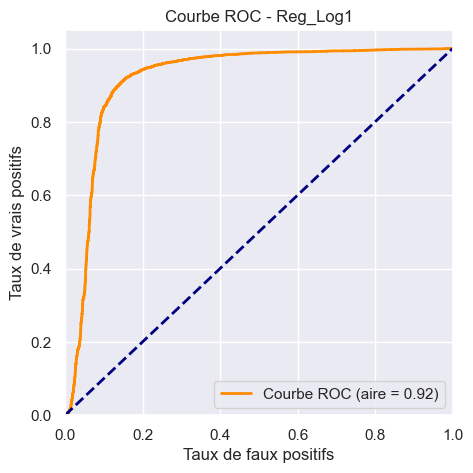

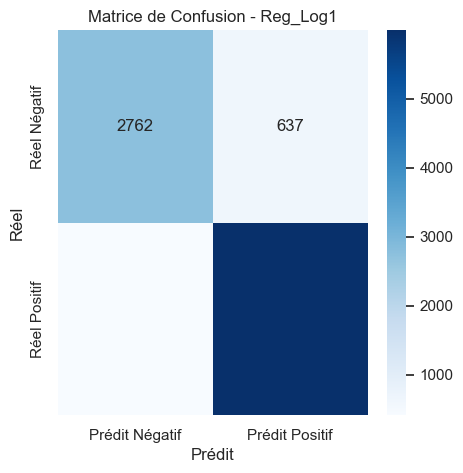

                      0
Model Scores   Reg_Log1
accuracy       0.893014
recall         0.935685
precision      0.903936
f1             0.919537
cross_entropy  0.354524
roc_auc        0.917845
cohen_kappa    0.760086


In [ ]:
# Construire et évaluer le modèle
y_test, y_pred, y_prob = My_model(X, y, 0.33)
metrics = Evaluation_Modele(y_test, y_pred, y_prob, "Reg_Log1")

# Afficher les métriques d'évaluation
print(metrics)